In [10]:
# Import packages
import pandas as pd
import numpy as np
import datetime as dt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib
import squarify

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import plotly.express as px

import sklearn.preprocessing as prep
import seaborn as sns

In [2]:
df_departments=pd.read_csv('departments.csv')
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [3]:
df_order=pd.read_csv('order_products.csv')
df_order.head(15)

,order_id,product_id,add_to_cart_order,reordered
0,10,24,1,1
1,10,83,2,1
2,10,16,3,0
3,10,24,4,1
4,10,83,5,1
5,10,16,6,0
6,10,24,7,1
7,10,92,8,1
8,10,92,9,1
9,10,59,10,0


In [4]:
orders_df=pd.read_csv('orders.csv')
orders_df.head() #df_user

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2425083,49125,1,2,18,NaN
1,1944304,162867,1,3,17,NaN
2,1201011,147243,14,0,16,3.0
3,1906860,195275,81,1,11,3.0
4,2766469,58222,3,6,11,6.0


In [5]:
df_products=pd.read_csv('products.csv')
df_products.head()

,product_id,department_id,product_name
0,61,19,cookies cakes
1,104,13,spices seasonings
2,94,7,tea
3,38,1,frozen meals
4,5,13,marinades meat preparation


In [25]:
orders_products_df= pd.merge(df_order, df_products, how='left', on='product_id')
orders_products_df = pd.merge(orders_products_df, df_departments, how='left', on='department_id')
orders_products_df.head(20)

,order_id,product_id,add_to_cart_order,reordered,department_id,product_name,department
0,10,24,1,1,4,fresh fruits,produce
1,10,83,2,1,4,fresh vegetables,produce
2,10,16,3,0,4,fresh herbs,produce
3,10,24,4,1,4,fresh fruits,produce
4,10,83,5,1,4,fresh vegetables,produce
5,10,16,6,0,4,fresh herbs,produce
6,10,24,7,1,4,fresh fruits,produce
7,10,92,8,1,18,baby food formula,babies
8,10,92,9,1,18,baby food formula,babies
9,10,59,10,0,15,canned meals beans,canned goods


In [7]:
prods = pd.read_csv('products.csv')
df_p = pd.read_csv('order_products.csv', usecols=['order_id', 'product_id'])
df_prod = pd.merge(df_p, prods, how='left', on='product_id').\
    drop(["product_id", "department_id"], axis=1)
df_prod.head()

,order_id,product_name
0,10,fresh fruits
1,10,fresh vegetables
2,10,fresh herbs
3,10,fresh fruits
4,10,fresh vegetables


C:\Users\pedro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


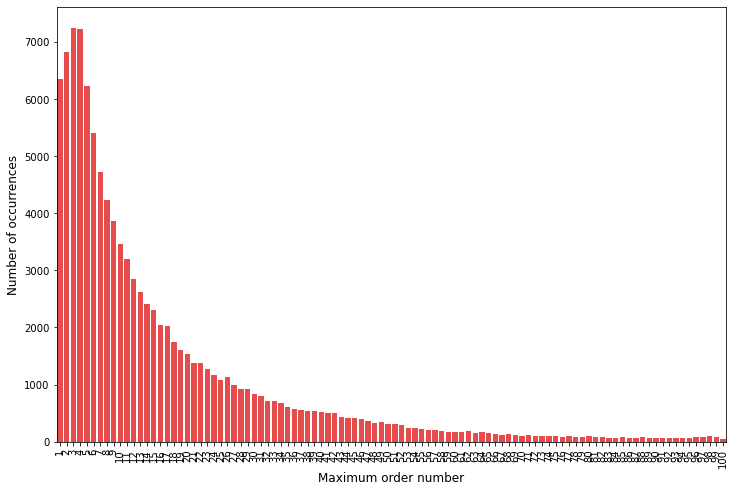

In [6]:
cnt_srs=orders_df.groupby('user_id')['order_number'].aggregate(np.max).reset_index()
cnt_srs= cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8,color='Red')
plt.ylabel('Number of occurrences',fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

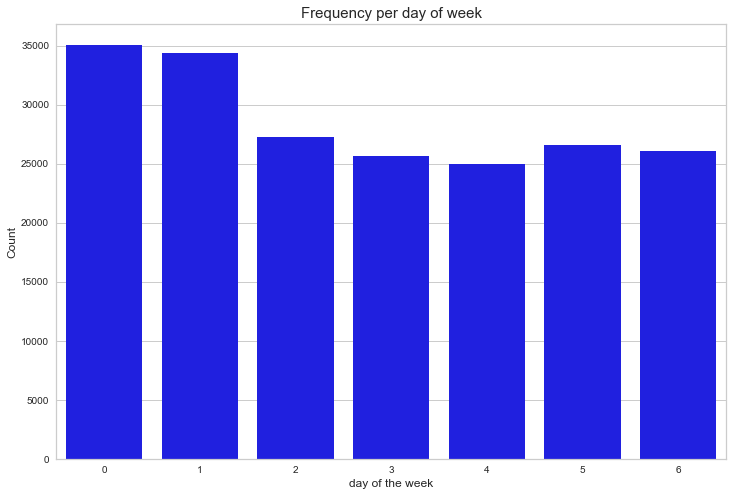

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(x='order_dow',data=orders_df,color='Blue')
plt.ylabel('Count', fontsize=12)
plt.xlabel('day of the week',fontsize=12)
plt.title('Frequency per day of week',fontsize=15)
plt.show()

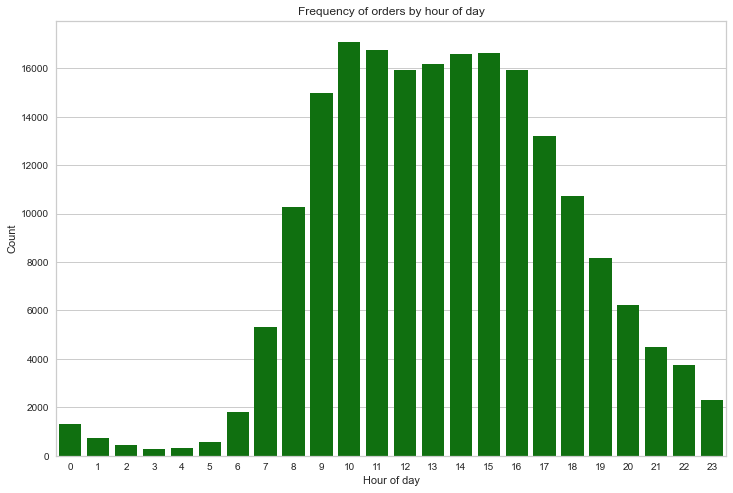

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x='order_hour_of_day',data=orders_df,color='Green')
plt.ylabel('Count')
plt.xlabel('Hour of day')
plt.title('Frequency of orders by hour of day')
plt.show()

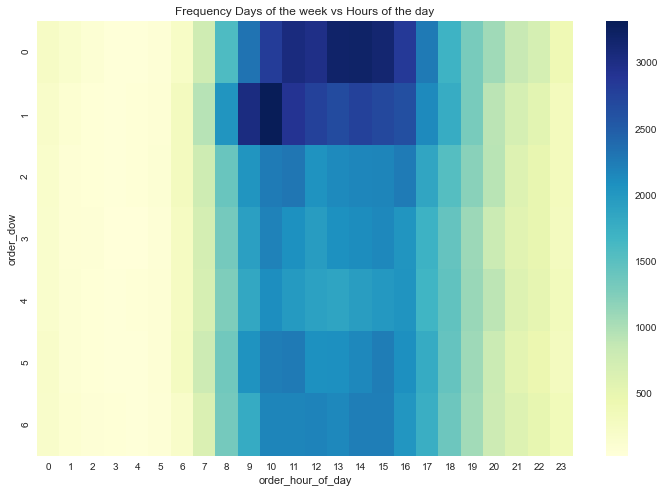

In [11]:
grouped_df=orders_df.groupby(['order_dow','order_hour_of_day'])['order_number'].aggregate('count').reset_index()
grouped_df=grouped_df.pivot('order_dow','order_hour_of_day','order_number')

plt.figure(figsize=(12,8))
sns.heatmap(grouped_df,cmap="YlGnBu")
plt.title('Frequency Days of the week vs Hours of the day')
plt.show()

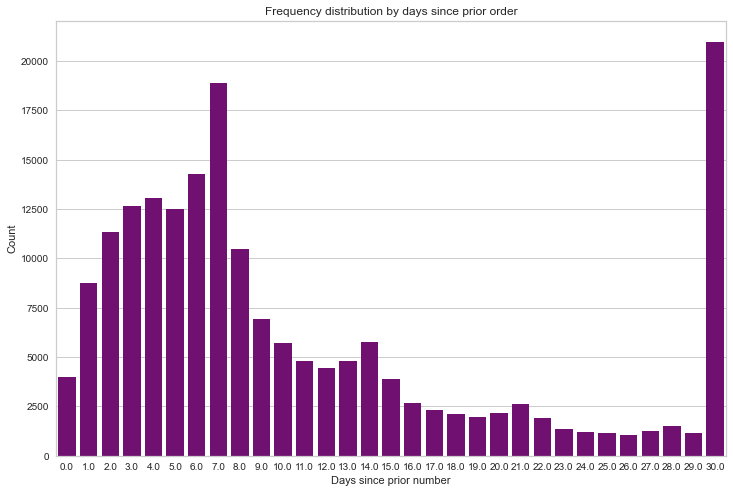

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(x='days_since_prior_order', data=orders_df, color= 'Purple')
plt.ylabel('Count')
plt.xlabel('Days since prior number')
plt.title('Frequency distribution by days since prior order')
plt.show()

In [18]:
grouped_df= orders_products_df.groupby('order_id')['reordered'].aggregate('sum').reset_index()
grouped_df['reordered'].loc[grouped_df['reordered']>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]


1    0.88172
0    0.11828
Name: reordered, dtype: float64

In [20]:
orders_products_df.reordered.sum()/orders_products_df.shape[0]

0.5897427136703571

C:\Users\joaop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



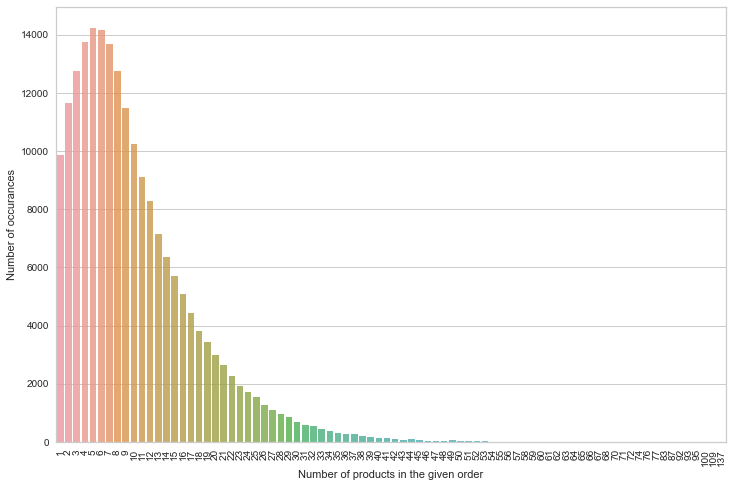

In [23]:
grouped_df=orders_products_df.groupby('order_id')['add_to_cart_order'].aggregate('max').reset_index()
cnt_srs=grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of occurances')
plt.xlabel('Number of products in the given order')
plt.xticks(rotation='vertical')
plt.show()

In [24]:
orders_products_df

,order_id,product_id,add_to_cart_order,reordered,department_id
0,10,24,1,1,4
1,10,83,2,1,4
2,10,16,3,0,4
3,10,24,4,1,4
4,10,83,5,1,4
...,...,...,...,...,...
2019496,3420578,66,17,0,6
2019497,3420578,16,18,1,4
2019498,3420693,37,1,0,1
2019499,3420693,37,2,0,1


In [30]:
cnt_srs= orders_products_df['product_name'].value_counts().reset_index()
cnt_srs.columns=['product_name','frequency_count']
cnt_srs.head(10)

,product_name,frequency_count
0,fresh fruits,226039
1,fresh vegetables,212611
2,packaged vegetables fruits,109596
3,yogurt,90751
4,packaged cheese,61502
5,milk,55150
6,water seltzer sparkling water,52564
7,chips pretzels,45306
8,soy lactosefree,39389
9,bread,36381


C:\Users\joaop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



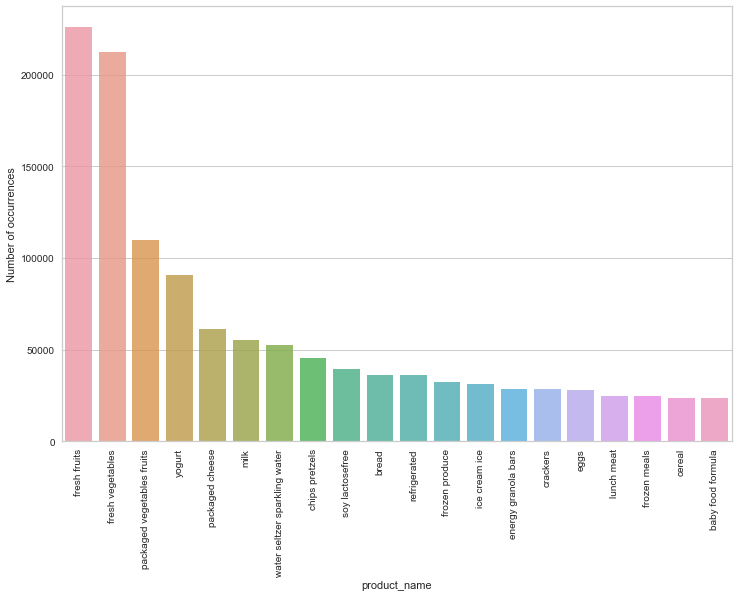

In [36]:
cnt_srs=orders_products_df['product_name'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of occurrences')
plt.xlabel('product_name')
plt.xticks(rotation='vertical')
plt.show()

C:\Users\joaop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



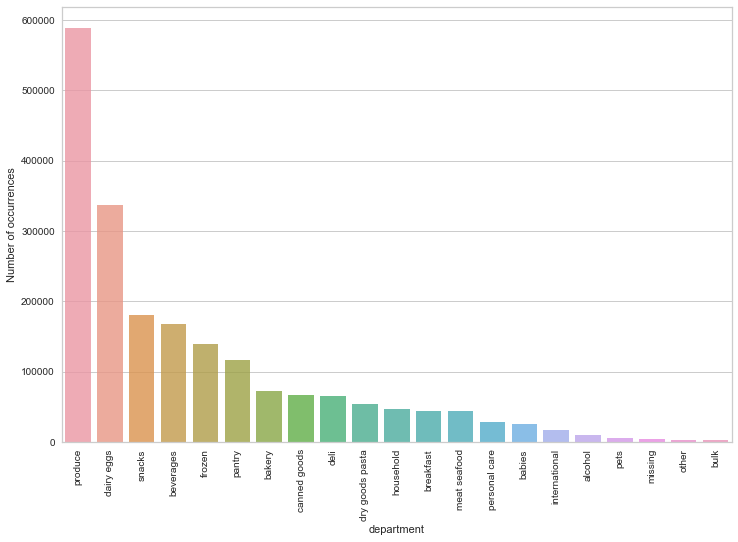

In [35]:
cnt_srs=orders_products_df['department'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of occurrences')
plt.xlabel('department')
plt.xticks(rotation='vertical')
plt.show()

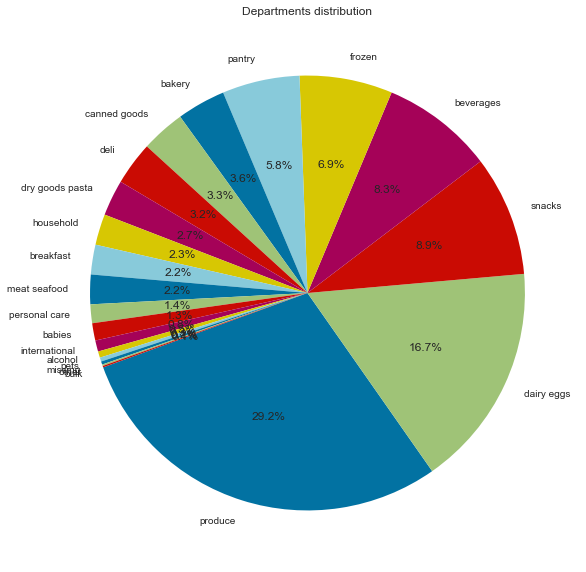

In [41]:
plt.figure(figsize=(10,10))
temp_series =orders_products_df['department'].value_counts()
labels=(np.array(temp_series.index))
sizes=(np.array((temp_series/temp_series.sum()*100)))
plt.pie(sizes, labels=labels,
       autopct='%1.1f%%', startangle=200)
plt.title('Departments distribution')
plt.show()

C:\Users\joaop\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joaop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



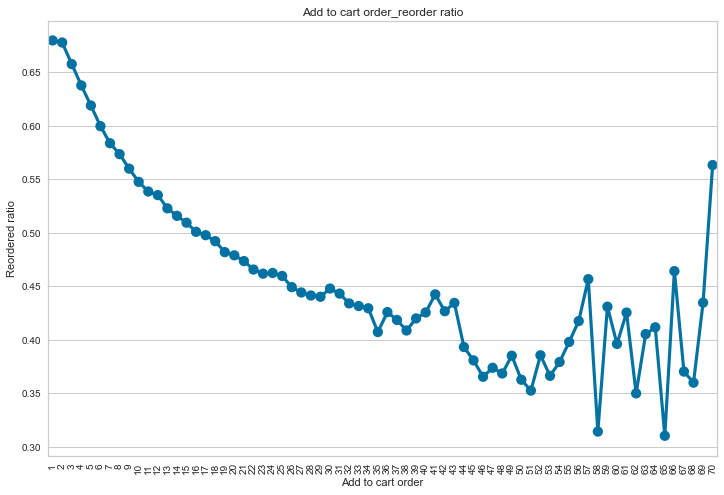

In [46]:
orders_products_df['add_to_cart_order_mod']=orders_products_df['add_to_cart_order'].copy()
orders_products_df['add_to_cart_order_mod'].loc[orders_products_df['add_to_cart_order_mod']>70]=70
grouped_df = orders_products_df.groupby(['add_to_cart_order_mod'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values , alpha=0.8)
plt.ylabel('Reordered ratio')
plt.xlabel('Add to cart order')
plt.title('Add to cart order_reorder ratio')
plt.xticks(rotation='vertical')
plt.show()

C:\Users\joaop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



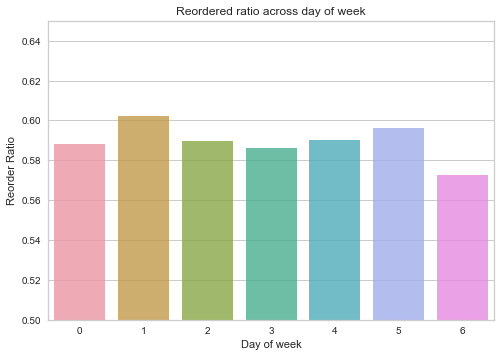

In [54]:
orders_products_df=pd.merge(orders_products_df,orders_df, on='order_id', how='left')
grouped_df=orders_products_df.groupby(['order_dow'])['reordered'].aggregate('mean').reset_index()
plt.figure()
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8)
plt.ylabel('Reorder Ratio')
plt.xlabel('Day of week')
plt.title('Reordered ratio across day of week')
plt.ylim(0.5 , 0.65)
plt.show()

C:\Users\joaop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



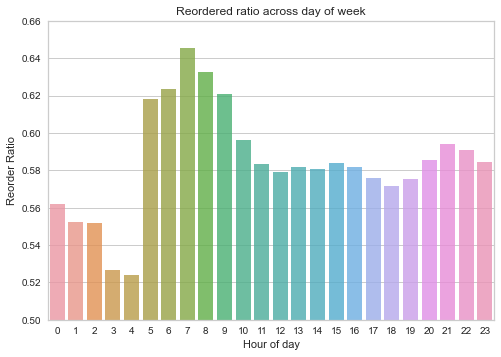

In [57]:
grouped_df=orders_products_df.groupby(['order_hour_of_day'])['reordered'].aggregate('mean').reset_index()
plt.figure()
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8)
plt.ylabel('Reorder Ratio')
plt.xlabel('Hour of day')
plt.title('Reordered ratio across day of week')
plt.ylim(0.5 , 0.66)
plt.show()